# Question 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline
plt.style.use('notebook.mplstyle');
%config InlineBackend.figure_format = 'svg'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

Text(0, 0.5, 'MSE')

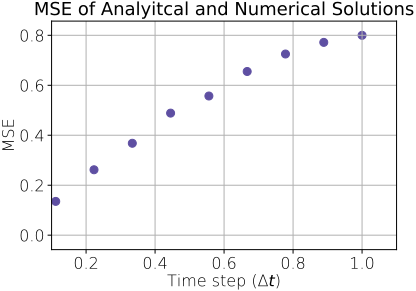

In [2]:
def numerical(tmax, Δt):
    # Initialization
    tmin = 0.0
    t = np.arange(tmin,tmax,Δt)
    N = np.ones_like(t)

    # Perform the numerical solution of the ODE
    for ti in range(len(N)-1):
        # fill in code here
        N[ti+1] = N[ti]*(1-Δt)
    return N
        
def analytical(tmax, Δt):
    t = np.arange(0, tmax, Δt)
    return np.exp(-t)

tmax = 5 # seconds
# t_steps = [.001, .005, .01, .05, .1, .5, 1]
t_steps = np.linspace(0.001, 1, 10)
plt.grid(linestyle='-', linewidth=1)
for ii, Δt in enumerate(t_steps):
    approx = numerical(tmax, Δt)
    exact = analytical(tmax, Δt)
#     error = np.mean(np.sqrt((approx-exact)**2))
    error = np.mean(np.abs(exact - approx)/exact)

    plt.scatter(Δt, error, color='#5E4Fa2')
plt.xlim((0.1, 1.1))
# plt.ylim((0, .125))
plt.title('MSE of Analyitcal and Numerical Solutions')
plt.xlabel(f'Time step ($\Delta t$)')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

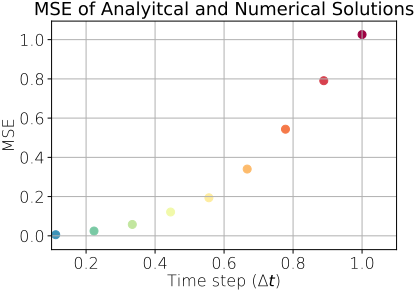

In [3]:
def runge_kutta(tmax, Δt):
    # Initialization
    tmin = 0.0
    t = np.arange(tmin,tmax,Δt)
    N = np.ones_like(t)

    # Perform the numerical solution of the ODE
    for ti in range(len(N)-1):
        # fill in code here
        x_p = N[ti] - 0.5*N[ti]*Δt
        N[ti+1] = N[ti] - x_p*Δt
    return N
t_steps = np.linspace(0.001, 1, 10)
plt.grid(linestyle='-', linewidth=1)

for ii, Δt in enumerate(t_steps):
    approx = runge_kutta(tmax, Δt)
    exact = analytical(tmax, Δt)
#     error = np.mean(np.sqrt((approx-exact)**2))
    error = np.mean(np.abs(exact - approx)/exact)
    plt.scatter(Δt, error)
plt.xlim((0.1, 1.1))

plt.title('MSE of Analyitcal and Numerical Solutions')
plt.xlabel(f'Time step ($\Delta t$)')
plt.ylabel('MSE')


In [4]:
from scipy.integrate import solve_ivp

Text(0, 0.5, 'Y')

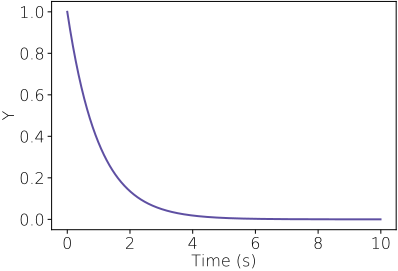

In [5]:
def radioactive(t, y):
    return -y # set τ = 1
t = np.arange(0,10,.01)
sol = solve_ivp(radioactive, (0,10), [1], t_eval=t)
plt.plot(sol.t, sol.y[0,:])
plt.xlabel('Time (s)')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

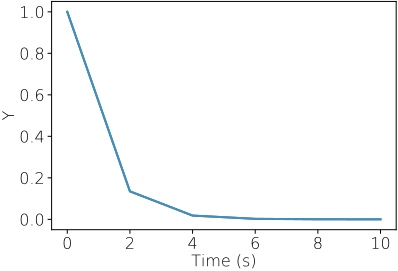

In [6]:
t_eval = [0, 2, 4, 6 ,8, 10]
sol1 = solve_ivp(radioactive, (0,10), [1], method='RK23', t_eval=t_eval)
plt.plot(sol1.t, sol1.y[0,:])
sol2 = solve_ivp(radioactive, (0,10), [1], method='BDF', t_eval=t_eval)
plt.plot(sol2.t, sol2.y[0,:])
plt.xlabel('Time (s)')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

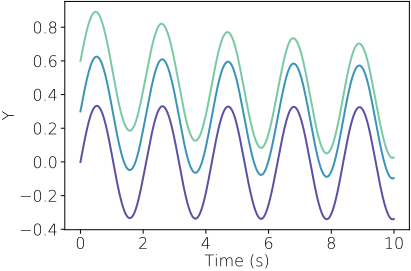

In [7]:
def interesting_fun(x,y):
    return np.cos(3*x) - .2*y**4 
IC = [ 0,.3 , .6]
t = np.arange(0,10,.01)
sol3 = solve_ivp(interesting_fun, (0,15), IC, t_eval=t, method='RK45')
for ii in range(len(IC)):
    plt.plot(sol3.t, sol3.y[ii,:])
plt.xlabel('Time (s)')
plt.ylabel('Y')

# Question 2

In [8]:
import numpy.random as npr
import scipy.constants as constants

In [9]:
# h = 6.5 * constants.foot
# vx = 67.5 * constants.mph
# vy = 1.2 * constants.mph
# vz = 1.7 * constants.mph
# ω = 0.4 
Δt = 0.01 # s
S0om = 4.1E-4
θ = 0
# theta n+1 = theta n + omega delta t
def B2om(v):
    '''The drag Coefficient of a baseball.
       v in m/s
    '''
    vd = 35.0 # m/s
    Δ = 5.0 # m/s
    return 0.0039 + 0.0058/(1.0 + np.exp((v-vd)/Δ))

def Fknuck(θ):
    '''The lateral acceleration on a knucleball in m/s^2'''
    from scipy.constants import g
    Fom = (0.5*g*(np.sin(4.0*θ) - 0.25*np.sin(8.0*θ) + 0.08*np.sin(12.0*θ) - 0.025*np.sin(16.0*θ)))/145
    return Fom
def rand_initals():
    h = (6.5 + npr.uniform(-0.2,0.2))* constants.foot
    z = -(1.5 + npr.uniform(-0.1,0.1)) * constants.foot
    vx = (67.5 + npr.uniform(-3.5,3.5)) * constants.mph
    vy = (1.2 + npr.uniform(-.4,.4)) * constants.mph
    vz = (1.7 + npr.uniform(-0.2,0.2)) * constants.mph
    ω = (0.4 + npr.uniform(-0.05,0.05)) * 2 * constants.pi
    θ = npr.uniform(0, 2*constants.pi)
    return h, z, vx, vy, vz, ω, θ
    
yz = np.zeros((20000,2))
for ii in range(20000):
    h, z, vx, vy, vz, ω, θ = rand_initals() 
    r = [[0.0, h, z]]
    while r[-1][0] <= 60.5*constants.foot:
        θ = θ + ω*Δt # increment theta each loop
        v = np.sqrt(vx**2 + vy**2 + vz**2)
        vx -= .0005*v*vx*Δt
        vy -= constants.g*Δt
        vz -= vx*ω*Δt*Fknuck(θ)
        r.append([r[-1][0]+vx*Δt,r[-1][1]+vy*Δt,r[-1][2]+vz*Δt])
    θ = 0
    r = np.array(r)
#     plt.plot(r[:,0]/constants.foot,r[0:,1]/constants.foot)
    yz[ii,0], yz[ii,1] = r[-1,1], r[-1, 2]
    


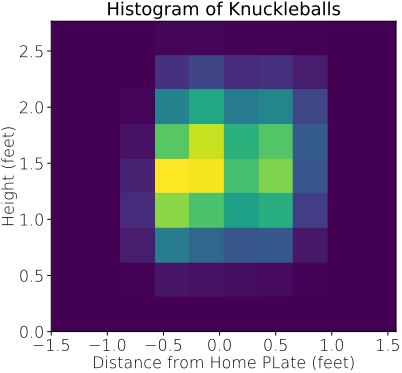

In [10]:
xedges, yedges = np.arange(-1.5, 1.6, np.sqrt(13.6)/12), np.arange(0, 3, np.sqrt(13.6)/12)
hist, yedges, xedges = np.histogram2d(yz[:,0]/constants.foot, yz[:,1]/constants.foot, bins=(yedges,xedges))
# plt.imshow(hist)
# fig = plt.figure(figsize=(6,6))
# ax = fig.add_subplot(111, title='pcolormesh: actual edges', aspect='equal')
# X, Y = np.meshgrid(xedges, yedges)
# ax.pcolormesh(Y, X, hist)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, title='Histogram of Knuckleballs', aspect='equal')
ax.set_ylabel('Height (feet)')
ax.set_xlabel('Distance from Home PLate (feet)')
plt.imshow(hist, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])


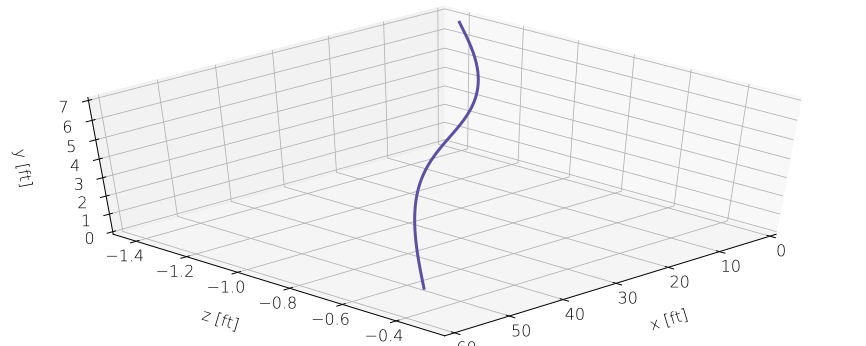

In [11]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(r[:,0]/constants.foot, r[:,2]/constants.foot, r[:,1]/constants.foot, linewidth=3)
ax.dist = 12

ax.set_xlabel('x [ft]')
ax.set_ylabel('z [ft]')
ax.set_zlabel('y [ft]')
ax.set_zlim3d(0,7)
ax.set_xlim3d(0,60.5)

ax.xaxis.labelpad=30
ax.yaxis.labelpad=30
ax.zaxis.labelpad=15
ax.view_init(45,45)